### Brain extraction(Skull stripping)

**Learning outcomes:**
- How to do brain extraction using registration.

In [7]:
%matplotlib inline

import os
from helpers import *

import ants
import SimpleITK as sitk

print(f'AntsPy version = {ants.__version__}')
print(f'SimpleITK version = {sitk.__version__}')

AntsPy version = 0.4.2
SimpleITK version = 2.3.1


In [8]:
raw_examples = [
    '/home/stefano/projects/augmentation/OASIS_BRAIN_1/traghetto/data/sub-OAS30010/ses-d0068/anat/sub-OAS30010_ses-d0068_T1w.nii.gz',
]

#### Raw Image

interactive(children=(IntSlider(value=127, description='SLICE', max=255), Output()), _dom_classes=('widget-int…

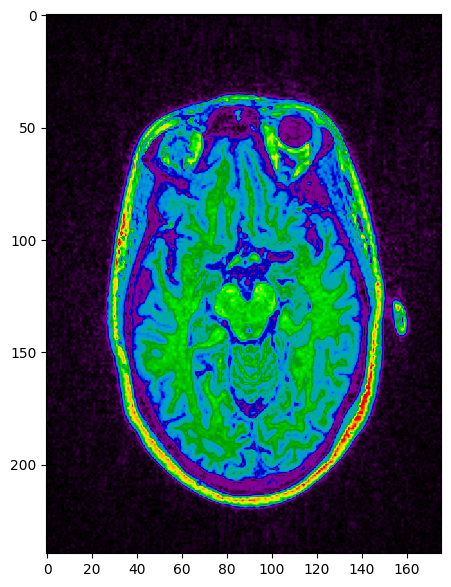

In [9]:
raw_example = raw_examples[0]
raw_img_ants = ants.image_read(raw_example, reorient='IAL')

explore_3D_array(arr=raw_img_ants.numpy(), cmap='nipy_spectral')

### Template based method (Native space)

#### Template Image

interactive(children=(IntSlider(value=90, description='SLICE', max=181), Output()), _dom_classes=('widget-inte…

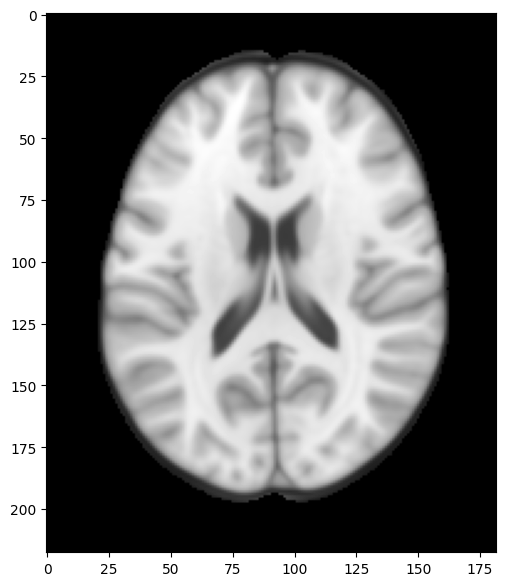

In [10]:
template_img_path = "MNI152_T1_1mm_Brain.nii.gz"
template_img_ants = ants.image_read(template_img_path, reorient='IAL')

explore_3D_array(arr = template_img_ants.numpy())

#### Brain Mask of the template

interactive(children=(IntSlider(value=90, description='SLICE', max=181), Output()), _dom_classes=('widget-inte…

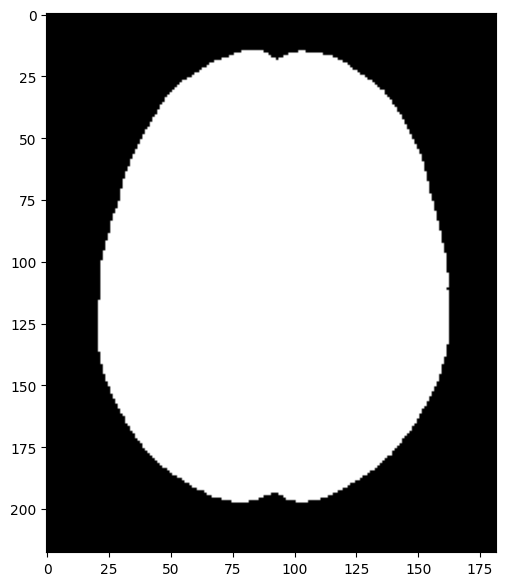

In [11]:
mask_template_img_path = "MNI152_T1_1mm_Brain_Mask.nii.gz"
mask_template_img_ants = ants.image_read(mask_template_img_path, reorient='IAL')

explore_3D_array(mask_template_img_ants.numpy())

In [12]:
np.unique(mask_template_img_ants.numpy())

array([0., 1.], dtype=float32)

#### Register template to raw image

In [13]:
transformation = ants.registration(
    fixed=raw_img_ants,
    moving=template_img_ants, 
    type_of_transform='SyN',
    verbose=True
)

antsRegistration -d 3 -r [0x5643fcdf3150,0x5643f6e071a0,1] -m mattes[0x5643fcdf3150,0x5643f6e071a0,1,32,regular,0.2] -t Affine[0.25] -c 2100x1200x1200x0 -s 3x2x1x0 -f 4x2x2x1 -x [NA,NA] -m mattes[0x5643fcdf3150,0x5643f6e071a0,1,32] -t SyN[0.200000,3.000000,0.000000] -c [40x20x0,1e-7,8] -s 2x1x0 -f 4x2x1 -u 1 -z 1 -o [/tmp/tmpva2il7a8,0x5643f61d7490,0x5643fcf36340] -x [NA,NA] --float 1 --write-composite-transform 0 -v 1
All_Command_lines_OK
Using single precision for computations.
The composite transform comprises the following transforms (in order): 
  1. Center of mass alignment using fixed image: 0x5643fcdf3150 and moving image: 0x5643f6e071a0 (type = Euler3DTransform)
  Reading mask(s).
    Registration stage 0
      No fixed mask
      No moving mask
    Registration stage 1
      No fixed mask
      No moving mask
  number of levels = 4
  number of levels = 3
  fixed image: 0x5643fcdf3150
  moving image: 0x5643f6e071a0
  fixed image: 0x5643fcdf3150
  moving image: 0x5643f6e071a0
D

In [14]:
print(transformation)

{'warpedmovout': ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (256, 240, 176)
	 Spacing    : (1.0547, 1.0547, 1.2)
	 Origin     : (105.0008, -151.5625, -133.9453)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]
, 'warpedfixout': ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (182, 218, 182)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (91.0, -91.0, -72.0)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]
, 'fwdtransforms': ['/tmp/tmpva2il7a81Warp.nii.gz', '/tmp/tmpva2il7a80GenericAffine.mat'], 'invtransforms': ['/tmp/tmpva2il7a80GenericAffine.mat', '/tmp/tmpva2il7a81InverseWarp.nii.gz']}


interactive(children=(IntSlider(value=127, description='SLICE', max=255), Output()), _dom_classes=('widget-int…

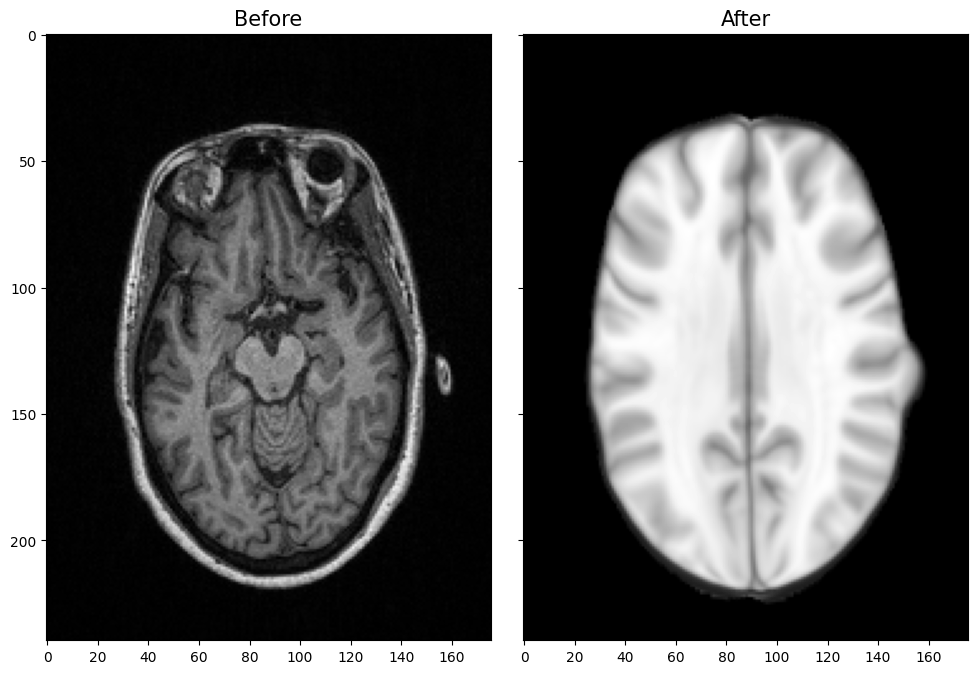

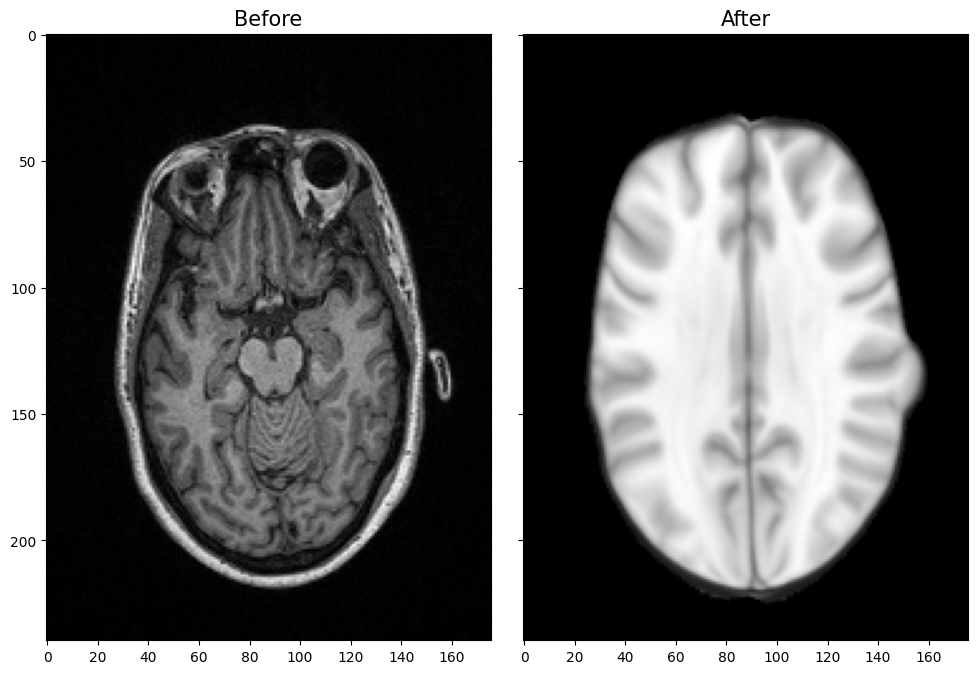

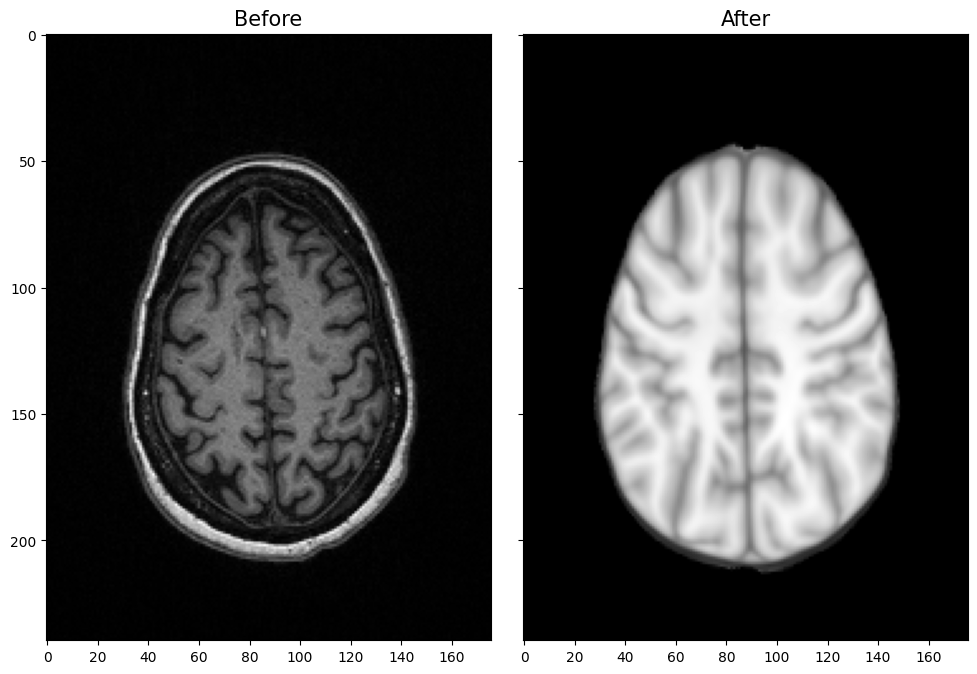

In [15]:
registered_img_ants = transformation['warpedmovout']

explore_3D_array_comparison(
    arr_before=raw_img_ants.numpy(), 
    arr_after=registered_img_ants.numpy()
)

#### Apply the generated transformations to the mask of template

In [16]:
brain_mask = ants.apply_transforms(
    fixed=transformation['warpedmovout'],
    moving=mask_template_img_ants,
    transformlist=transformation['fwdtransforms'],
    interpolator='nearestNeighbor',
    verbose=True
)

['-d', '3', '-i', '0x5643f75caad0', '-o', '0x5643f75a4880', '-r', '0x5643f770ae70', '-n', 'nearestNeighbor', '-t', '/tmp/tmpva2il7a81Warp.nii.gz', '-t', '/tmp/tmpva2il7a80GenericAffine.mat']
Using single precision for computations.
Input scalar image: 0x5643f75caad0
Reference image: 0x5643f770ae70
The composite transform comprises the following transforms (in order): 
  1. /tmp/tmpva2il7a80GenericAffine.mat (type = AffineTransform)
  2. /tmp/tmpva2il7a81Warp.nii.gz (type = DisplacementFieldTransform)
Default pixel value: 0
Interpolation type: NearestNeighborInterpolateImageFunction
Output warped image: 0x5643f75a4880


interactive(children=(IntSlider(value=127, description='SLICE', max=255), Output()), _dom_classes=('widget-int…

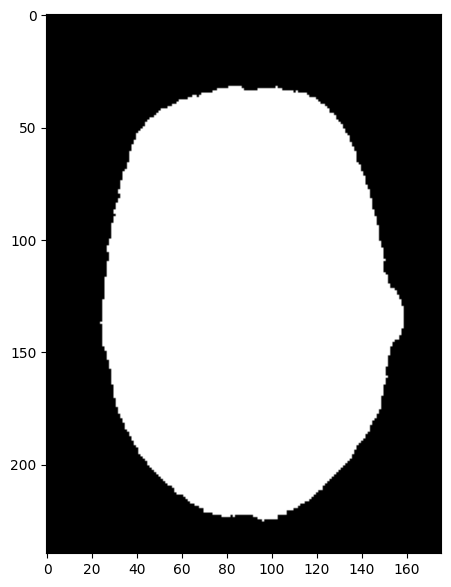

In [17]:
explore_3D_array(brain_mask.numpy())

interactive(children=(IntSlider(value=127, description='SLICE', max=255), Output()), _dom_classes=('widget-int…

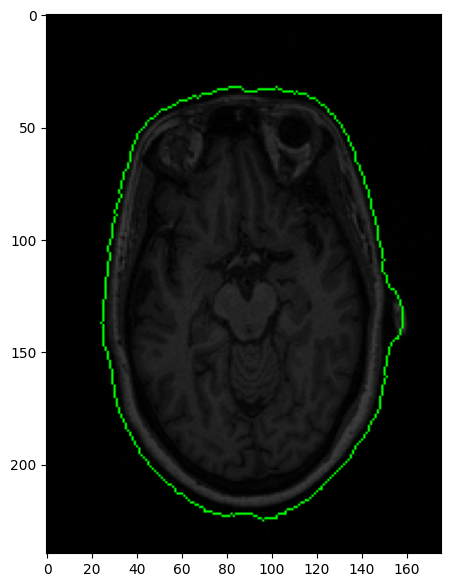

In [18]:
explore_3D_array_with_mask_contour(raw_img_ants.numpy(), brain_mask.numpy())

interactive(children=(IntSlider(value=127, description='SLICE', max=255), Output()), _dom_classes=('widget-int…

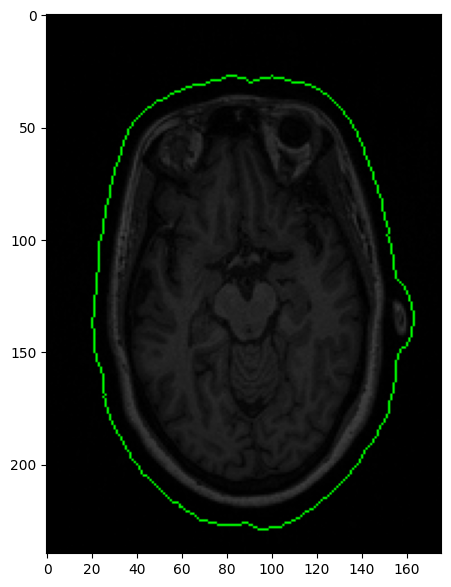

In [19]:
brain_mask_dilated = ants.morphology(brain_mask, radius=4, operation='dilate', mtype='binary')

explore_3D_array_with_mask_contour(raw_img_ants.numpy(), brain_mask_dilated.numpy())

#### Save brain mask

In [32]:
out_folder =  "/home/stefano/projects/augmentation/testing/outfolder/"
os.makedirs(out_folder, exist_ok=True) # create folder if not exists

out_filename = add_suffix_to_filename(raw_example, suffix='brainMaskByTemplate')
out_path = os.path.join(out_folder, out_filename)

# print(raw_img_path[len(BASE_DIR):])
# print(out_path[len(BASE_DIR):])

In [33]:
brain_mask_dilated.to_file(out_path)

#### Generate brain masked

interactive(children=(IntSlider(value=127, description='SLICE', max=255), Output()), _dom_classes=('widget-int…

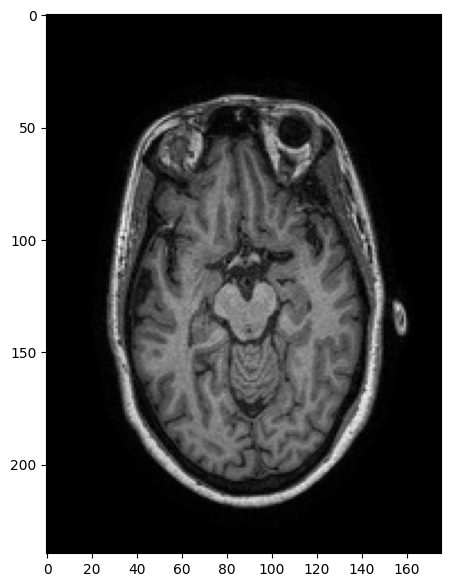

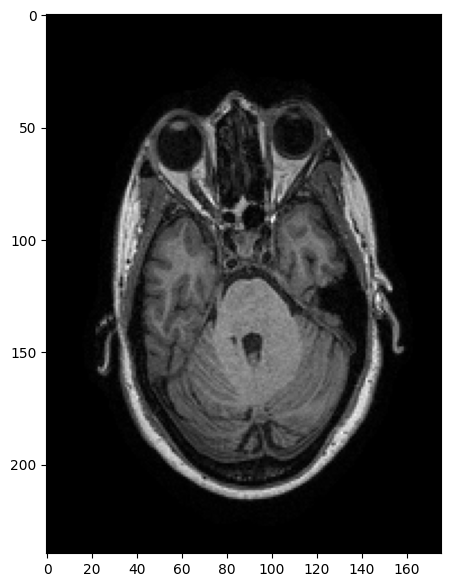

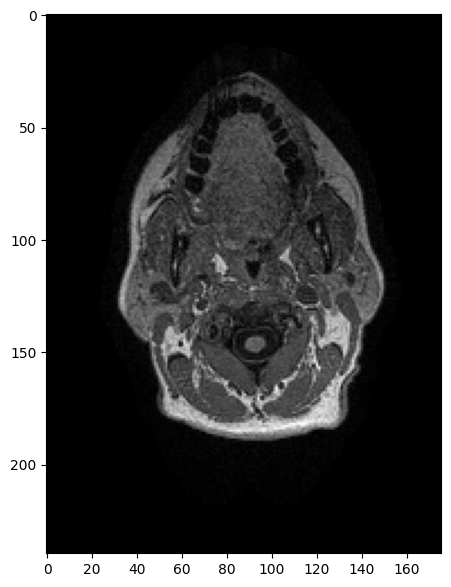

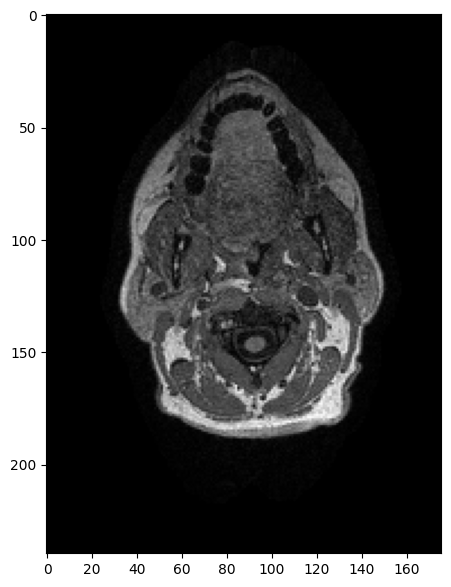

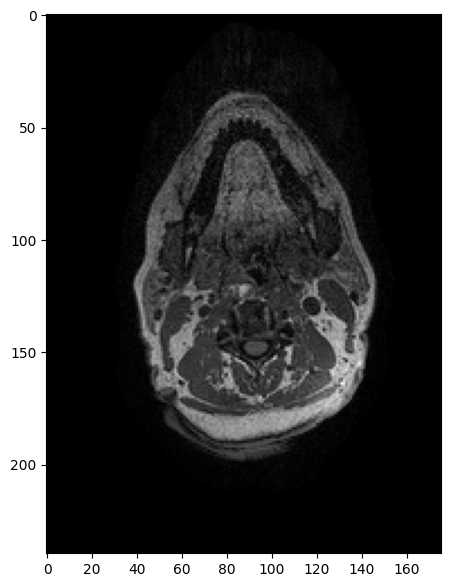

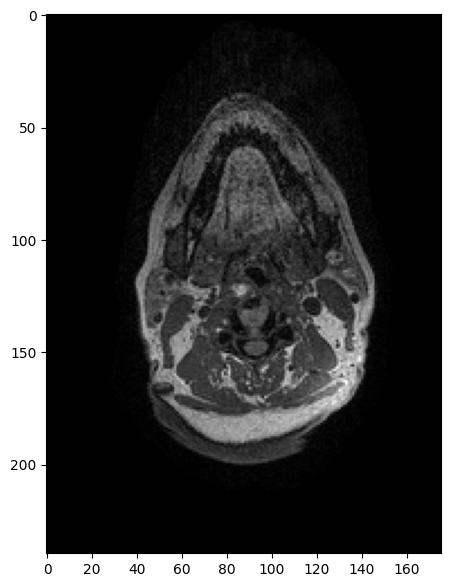

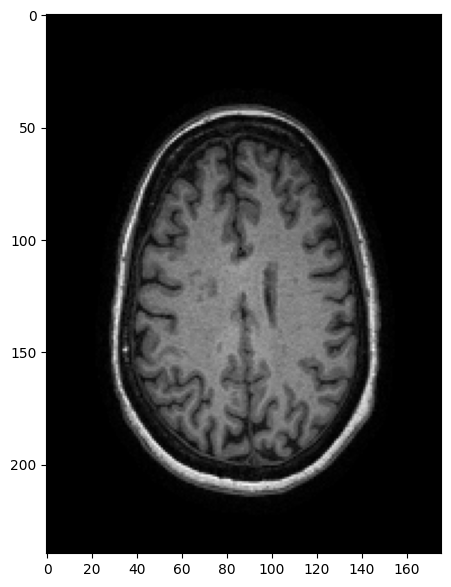

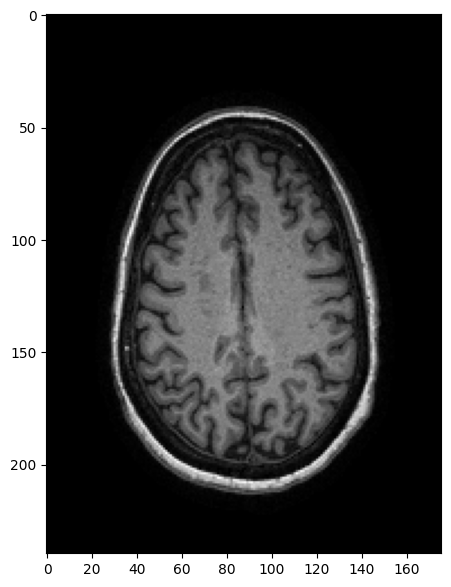

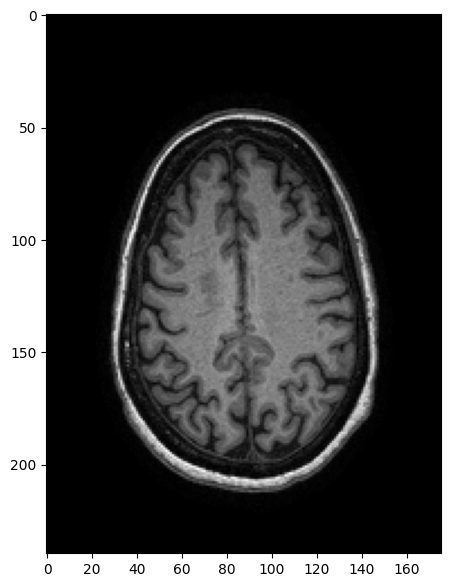

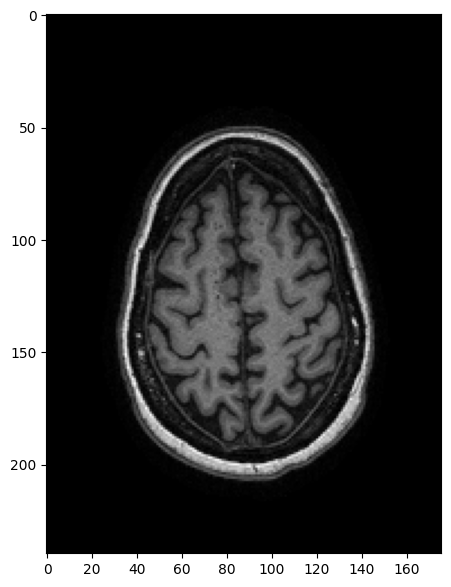

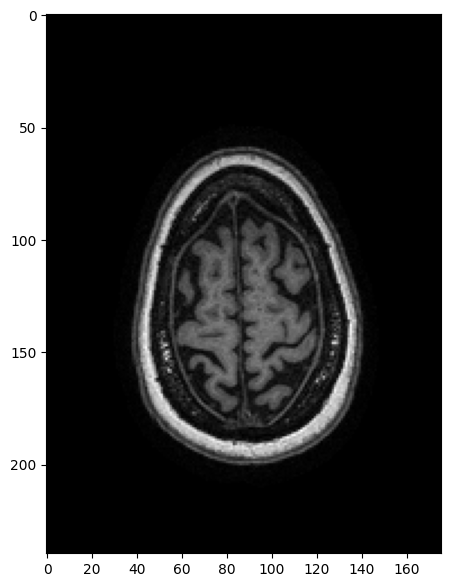

In [34]:
masked = ants.mask_image(raw_img_ants, brain_mask_dilated)

explore_3D_array(masked.numpy())

In [35]:
out_filename = add_suffix_to_filename(raw_example, suffix='brainMaskedByTemplate')
out_path = os.path.join(out_folder, out_filename)

# print(raw_img_path[len(BASE_DIR):])
# print(out_path[len(BASE_DIR):])

In [36]:
masked.to_file(out_path)